In [112]:
import numpy as np
import nibabel as nib
import os
import matplotlib.pyplot as plt
import pandas as pd
from convert_fm import convert_img_ppm_to_Hz_data, convert_ppm_data_to_Hz_data
from demod import demod_pls
from extract_metric import extract_metrics

# <span style="color:orange"> *db0_032 processing* </span> 

In [113]:
path_to_fms = "E:/msc_data/ismrm_2025/db0_032/fm/sim/fms"
path_to_dmod_mask = "E:/msc_data/ismrm_2025/db0_032/fm/sim/D2_D3_masks/cord_mask.nii.gz"
path_to_labeled_cord = "E:/msc_data/ismrm_2025/db0_032/fm/sim/D2_D3_masks/cord_mask_labeled.nii.gz"
path_to_metrics = "E:/msc_data/ismrm_2025/db0_032/fm/sim/D4_metrics"
path_to_dmod_folder = "E:/msc_data/ismrm_2025/db0_032/fm/sim/dmod_sim"

## Measured B0 - Inspiration & Expiration

### <span style="color:green"> Expiration </span> 

In [140]:
path_to_exp_meas = "E:/msc_data/ismrm_2025/db0_032/fm/C1_meas/exp/tests/test6_pro/B0.nii"
path_to_exp_dmod_mask = "E:/msc_data/ismrm_2025/db0_032/fm/processing_steps/exp/label_vert/cord_mask.nii.gz"
path_to_exp_metric_mask = "E:/msc_data/ismrm_2025/db0_032/fm/processing_steps/exp/label_vert_c3c4/cord_mask_labeled.nii.gz"

In [141]:
# Load images and get nifti data to manipulate!
exp_B0_meas_img = nib.load(path_to_exp_meas)
exp_B0_meas_data = exp_B0_meas_img.get_fdata()

exp_dmod_mask_img = nib.load(path_to_exp_dmod_mask)
exp_dmod_mask_data = exp_dmod_mask_img.get_fdata()

exp_metric_mask_img = nib.load(path_to_exp_metric_mask)
exp_metric_mask_data = exp_metric_mask_img.get_fdata()


In [142]:
exp_dmod_value = np.mean(exp_B0_meas_data[exp_dmod_mask_data==1])
print("Expiration demod value: ",exp_dmod_value," Hz")

Expiration demod value:  -237.49879980185443  Hz


In [143]:
exp_dmod_B0_meas = exp_B0_meas_data - exp_dmod_value
# Create nifti and save
exp_dmod_B0_meas_img = nib.Nifti1Image(exp_dmod_B0_meas, affine = exp_B0_meas_img.affine)
path_to_exp_dmod_fm = "E:/msc_data/ismrm_2025/db0_032/fm/C_dmod_meas/exp/exp_dmod_B0_meas.nii.gz"
nib.save(exp_dmod_B0_meas_img,path_to_exp_dmod_fm)

In [150]:
# Extract metrics, plot and save value
exp_B0_metrics_path =  "E:/msc_data/ismrm_2025/db0_032/fm/C_dmod_meas/exp/exp_metrics.csv"
extract_metrics(path_to_exp_dmod_fm, path_to_exp_dmod_mask, path_to_exp_metric_mask, exp_B0_metrics_path, method='wa', vert="3:15")

Metrics extracted successfully: 
--
Spinal Cord Toolbox (6.2)

sct_extract_metric -i E:/msc_data/ismrm_2025/db0_032/fm/C_dmod_meas/exp/exp_dmod_B0_meas.nii.gz -f E:/msc_data/ismrm_2025/db0_032/fm/processing_steps/exp/label_vert/cord_mask.nii.gz -method wa -vert 3:15 -vertfile E:/msc_data/ismrm_2025/db0_032/fm/processing_steps/exp/label_vert_c3c4/cord_mask_labeled.nii.gz -perlevel 1 -o E:/msc_data/ismrm_2025/db0_032/fm/C_dmod_meas/exp/exp_metrics.csv
--


Load metric image...
Estimation for label: cord_mask

Done! To view results, type:
start E:/msc_data/ismrm_2025/db0_032/fm/C_dmod_meas/exp/exp_metrics.csv




In [151]:
exp_metrics_df = pd.read_csv(exp_B0_metrics_path)
exp_metrics_data = exp_metrics_df['WA()']
exp_metrics_data = exp_metrics_data[::-1]
exp_metrics_data

12   -133.966738
11   -121.118786
10    -80.314337
9      -8.943227
8      55.167182
7      39.844835
6     -12.995903
5      -8.459881
4      22.489457
3      56.544607
2      63.354887
1      41.714478
0      19.229226
Name: WA(), dtype: float64

In [153]:
# For this case exp and insp go from 4 to 16 so we gotta add None to C3
exp_metrics_data_comp = pd.concat([exp_metrics_data, pd.Series([None])]).reset_index(drop=True)
exp_metrics_data_comp

0    -133.966738
1    -121.118786
2     -80.314337
3      -8.943227
4      55.167182
5      39.844835
6     -12.995903
7      -8.459881
8      22.489457
9      56.544607
10     63.354887
11     41.714478
12     19.229226
13          None
dtype: object

### <span style="color:red"> Inspiration </span> 

In [121]:
path_to_insp_meas = "E:/msc_data/ismrm_2025/db0_032/fm/C1_meas/insp/tests/test6_pro/B0.nii"
path_to_insp_dmod_mask = "E:/msc_data/ismrm_2025/db0_032/fm/processing_steps/insp/label_vert/cord_mask.nii.gz"
path_to_insp_metric_mask = "E:/msc_data/ismrm_2025/db0_032/fm/processing_steps/insp/label_vert/cord_mask_labeled.nii.gz"

In [122]:
# Load images and get nifti data to manipulate!
insp_B0_meas_img = nib.load(path_to_insp_meas)
insp_B0_meas_data = insp_B0_meas_img.get_fdata()

insp_dmod_mask_img = nib.load(path_to_insp_dmod_mask)
insp_dmod_mask_data = insp_dmod_mask_img.get_fdata()

insp_metric_mask_img = nib.load(path_to_insp_metric_mask)
insp_metric_mask_data = insp_metric_mask_img.get_fdata()

In [123]:
insp_dmod_value = np.mean(insp_B0_meas_data[insp_dmod_mask_data==1])
print("Inspiration demod value: ",insp_dmod_value," Hz")

Inspiration demod value:  -226.22557016176847  Hz


In [124]:
insp_dmod_B0_meas = insp_B0_meas_data - insp_dmod_value
# Create nifti and save
insp_dmod_B0_meas_img = nib.Nifti1Image(insp_dmod_B0_meas, affine = insp_B0_meas_img.affine)
path_to_insp_dmod_fm = "E:/msc_data/ismrm_2025/db0_032/fm/C_dmod_meas/insp/insp_dmod_B0_meas.nii.gz"
nib.save(insp_dmod_B0_meas_img, path_to_insp_dmod_fm)

In [125]:
insp_B0_metrics_path = "E:/msc_data/ismrm_2025/db0_032/fm/C_dmod_meas/insp/insp_metrics.csv"
extract_metrics(path_to_insp_dmod_fm, path_to_insp_dmod_mask, path_to_insp_metric_mask, insp_B0_metrics_path, method='wa', vert="3:15")

Metrics extracted successfully: 
--
Spinal Cord Toolbox (6.2)

sct_extract_metric -i E:/msc_data/ismrm_2025/db0_032/fm/C_dmod_meas/insp/insp_dmod_B0_meas.nii.gz -f E:/msc_data/ismrm_2025/db0_032/fm/processing_steps/insp/label_vert/cord_mask.nii.gz -method wa -vert 3:15 -vertfile E:/msc_data/ismrm_2025/db0_032/fm/processing_steps/insp/label_vert/cord_mask_labeled.nii.gz -perlevel 1 -o E:/msc_data/ismrm_2025/db0_032/fm/C_dmod_meas/insp/insp_metrics.csv
--


Load metric image...
Estimation for label: cord_mask

Done! To view results, type:
start E:/msc_data/ismrm_2025/db0_032/fm/C_dmod_meas/insp/insp_metrics.csv




In [126]:
insp_metrics_df = pd.read_csv(insp_B0_metrics_path)
insp_metrics_data = insp_metrics_df['WA()']
insp_metrics_data = insp_metrics_data[::-1]
insp_metrics_data

12   -106.765630
11    -78.994747
10     -3.712555
9      95.571609
8     153.102335
7      95.810823
6     -12.150226
5     -53.264191
4     -43.344680
3     -21.873568
2     -11.487829
1     -11.175013
0     -26.279172
Name: WA(), dtype: float64

In [148]:
# For this case exp and insp go from 4 to 16 so we gotta add None to C3
insp_metrics_data_comp = pd.concat([insp_metrics_data, pd.Series([None])]).reset_index(drop=True)
insp_metrics_data_comp

0     -106.76563
1     -78.994747
2      -3.712555
3      95.571609
4     153.102335
5      95.810823
6     -12.150226
7     -53.264191
8      -43.34468
9     -21.873568
10    -11.487829
11    -11.175013
12    -26.279172
13          None
dtype: object

### <span style="color:purple"> Average Insp and Exp </span> 

In [132]:
avg_respiration = (exp_metrics_data_comp + insp_metrics_data_comp )/2
avg_respiration

0            NaN
1    -106.480743
2     -62.415671
3       7.628636
4      70.102047
5      74.679581
6      12.407146
7     -33.130047
8     -25.902281
9       0.307945
10     22.528389
11     26.089937
12      7.717653
13           NaN
dtype: object

### Simualted FM loading, demod, extract metric and plot!
The path_to_fm variable will contain 1 to n number of fms that we want to extract, demodulated and extract metrics

In [128]:
from utils.show_slice import display_nifti_slice
from convert_fm import convert_ppm_data_to_Hz_data
from extract_metric import extract_metrics
import re

dmod_mask_img = nib.load(path_to_dmod_mask)
dmod_mask_data = dmod_mask_img.get_fdata()

metric_mask_img = nib.load(path_to_labeled_cord)
metric_mask_data = metric_mask_img.get_fdata()


In [129]:
phrase = "ppm"

for filename in os.listdir(path_to_fms):
    path_to_curr_fm = os.path.join(path_to_fms, filename)
    current_fm_img = nib.load(path_to_curr_fm)
    current_fm_data = current_fm_img.get_fdata()
    
    #display_nifti_slice(path_to_curr_fm, 470, 'ppm', inf_limit=-5, sup_limit=5, cmap = 'gray')

    # Now, demodulationg by the average over the mask -> demod mask
    demod_value = np.mean(current_fm_data[dmod_mask_data==1])
    print(f"Demod value for {filename}:",demod_value)

    curr_dmod_fm_ppm = current_fm_data - demod_value
    dmod_fm_Hz = convert_ppm_data_to_Hz_data(curr_dmod_fm_ppm,3)

    # Small RE block to update the FM name from ppm to Hz
    match = re.search(re.escape(phrase), filename)

    if match:
        #start, end = match.start(), match.end()
        print(f"Phrase found")
        updated_text = "dmod_" + re.sub(phrase, 'Hz', filename)
        print("New filename:",updated_text)
    else:
        print("Phrase not found.")
        if filename.endswith(".nii.gz"): # Maybe code for .nii later (not urgent)
            base_name = filename[:-7]  # Remove the `.nii.gz`
            extension = ".nii.gz"
        else:
            base_name, extension = os.path.splitext(filename)
                # Add 'Hz' to the base name and retain the extension
        updated_text = "dmod_" + base_name + "_Hz" + extension
        print("New filename:", updated_text)
    
    # Saving the demod fm to its new folder with custom name

    dmod_save_path = os.path.join(path_to_dmod_folder,updated_text)
    dmod_fm_img = nib.Nifti1Image(dmod_fm_Hz, affine = current_fm_img.affine)
    nib.save(dmod_fm_img,dmod_save_path)

    # Now metric extraction + saving and plotting :)

    


Demod value for db0_032_fm_opt_chi_ppm.nii.gz: -2.119983176442465
Phrase found
New filename: dmod_db0_032_fm_opt_chi_Hz.nii.gz
Demod value for db0_032_fm_ppm.nii.gz: -2.123123427725569
Phrase found
New filename: dmod_db0_032_fm_Hz.nii.gz
Demod value for test1_fm.nii.gz: -1.0418373620866774
Phrase not found.
New filename: dmod_test1_fm_Hz.nii.gz


In [130]:
phrase = "ppm"
for filename in os.listdir(path_to_dmod_folder):
    print(filename)
    path_to_dmod_fm = os.path.join(path_to_dmod_folder, filename)
    # Testing extract metric subprocess
    if filename.endswith(".nii.gz"): # Maybe code for .nii later (not urgent)
        base_name = filename[:-7]  # Remove the `.nii.gz`
        extension = ".nii.gz"
    updated_text = "metrics_" + base_name + ".csv"
    outfn = os.path.join(path_to_metrics,updated_text)
    extract_metrics(path_to_dmod_fm, path_to_dmod_mask, path_to_labeled_cord, outfn, method='wa', vert="3:15")


dmod_db0_032_fm_Hz.nii.gz
Metrics extracted successfully: 
--
Spinal Cord Toolbox (6.2)

sct_extract_metric -i E:/msc_data/ismrm_2025/db0_032/fm/sim/dmod_sim\dmod_db0_032_fm_Hz.nii.gz -f E:/msc_data/ismrm_2025/db0_032/fm/sim/D2_D3_masks/cord_mask.nii.gz -method wa -vert 3:16 -vertfile E:/msc_data/ismrm_2025/db0_032/fm/sim/D2_D3_masks/cord_mask_labeled.nii.gz -perlevel 1 -o E:/msc_data/ismrm_2025/db0_032/fm/sim/D4_metrics\metrics_dmod_db0_032_fm_Hz.csv
--


Load metric image...
Estimation for label: cord_mask

Done! To view results, type:
start E:/msc_data/ismrm_2025/db0_032/fm/sim/D4_metrics\metrics_dmod_db0_032_fm_Hz.csv


dmod_db0_032_fm_opt_chi_Hz.nii.gz
Metrics extracted successfully: 
--
Spinal Cord Toolbox (6.2)

sct_extract_metric -i E:/msc_data/ismrm_2025/db0_032/fm/sim/dmod_sim\dmod_db0_032_fm_opt_chi_Hz.nii.gz -f E:/msc_data/ismrm_2025/db0_032/fm/sim/D2_D3_masks/cord_mask.nii.gz -method wa -vert 3:16 -vertfile E:/msc_data/ismrm_2025/db0_032/fm/sim/D2_D3_masks/cord_mask_labele

E:/msc_data/ismrm_2025/db0_032/fm/sim/D4_metrics\metrics_dmod_db0_032_fm_Hz.csv
metrics_dmod_db0_032_fm_Hz
E:/msc_data/ismrm_2025/db0_032/fm/sim/D4_metrics\metrics_dmod_db0_032_fm_opt_chi_Hz.csv
metrics_dmod_db0_032_fm_opt_chi_Hz
E:/msc_data/ismrm_2025/db0_032/fm/sim/D4_metrics\metrics_dmod_test1_fm_Hz.csv
metrics_dmod_test1_fm_Hz


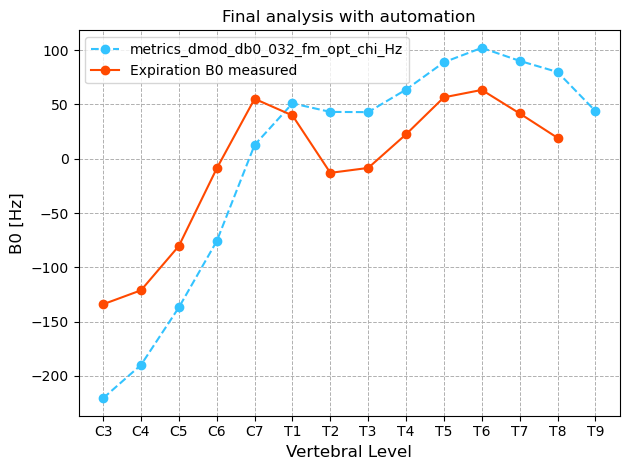

In [155]:
vertebrae_levels = ['C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7','T8', 'T9'] # From 3 to 16
colors = ['#33C3FF','#DBA5FD','#008000','#4d79ff','996633']
color_index = 0
for fn in os.listdir(path_to_metrics):

    #print(fn)
    metric_fn = os.path.join(path_to_metrics,fn)
    print(metric_fn)
    metric_df = pd.read_csv(metric_fn)

    metric_values = metric_df['WA()']
    metric_values = metric_values[::-1]

    if fn.endswith(".csv"): # Maybe code for .nii later (not urgent)
        base_name = fn[:-4]  # Remove the `.nii.gz`
        extension = ".csv"

    print(base_name)
    if base_name == "metrics_dmod_db0_032_fm_opt_chi_Hz":

        plt.plot(vertebrae_levels, metric_values, marker = 'o', linestyle = '--', label = base_name, color = colors[color_index % len(colors)]) 
        color_index += 1

# Adding expiration and inspiration measured values
plt.plot(vertebrae_levels, exp_metrics_data_comp, marker = 'o', linestyle = '-', label = "Expiration B0 measured", color = "#ff4900")
#plt.plot(vertebrae_levels, insp_metrics_data_comp, marker = 'o', linestyle = '-', label = "Inspiration B0 measured", color = "#ffad00")
#plt.plot(vertebrae_levels, avg_respiration, marker = 'o', linestyle = ':', label = "Avg respiratin B0 meas", color = "#264cff")
plt.title("Final analysis with automation")
plt.xlabel('Vertebral Level', fontsize=12)
plt.ylabel('B0 [Hz]', fontsize=12)
plt.legend()
# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()

